In [19]:
import tensorflow

In [20]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(400,400, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(4, activation='softmax'))

In [21]:
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
optimizer=optimizers.RMSprop(learning_rate=1e-4),
metrics=['acc'])

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [23]:
train_generator = train_datagen.flow_from_directory(
'train',
target_size=(400, 400),batch_size=5,class_mode='categorical')

Found 94 images belonging to 4 classes.


In [24]:
validation_generator = validation_datagen.flow_from_directory(
    'Validation',
     target_size=(400, 400),batch_size=5,class_mode="categorical")

Found 34 images belonging to 4 classes.


In [25]:
test_generator = test_datagen.flow_from_directory(
'test',target_size=(400, 400),
batch_size=5,
class_mode='categorical')

Found 26 images belonging to 4 classes.


In [26]:
train_generator.class_indices

{'Abbas': 0, 'Farooq': 1, 'Saeed': 2, 'Shakeel': 3}

In [27]:
history = model.fit_generator(
train_generator,
steps_per_epoch=10,
epochs=15,
validation_data=validation_generator,validation_steps=7)

Epoch 1/15
10/10 [==============================] - 67s 7s/step - loss: 2.5273 - acc: 0.2600 - val_loss: 1.4300 - val_acc: 0.2647
Epoch 2/15
10/10 [==============================] - 58s 6s/step - loss: 1.4902 - acc: 0.2653 - val_loss: 1.3229 - val_acc: 0.2353
Epoch 3/15
10/10 [==============================] - 56s 6s/step - loss: 1.1531 - acc: 0.4286 - val_loss: 1.1131 - val_acc: 0.5294
Epoch 4/15
10/10 [==============================] - 56s 6s/step - loss: 0.9944 - acc: 0.5800 - val_loss: 0.9772 - val_acc: 0.4118
Epoch 5/15
10/10 [==============================] - 56s 6s/step - loss: 0.7781 - acc: 0.6939 - val_loss: 0.8000 - val_acc: 0.7647
Epoch 6/15
10/10 [==============================] - 56s 6s/step - loss: 0.4426 - acc: 0.9184 - val_loss: 0.4620 - val_acc: 0.8529
Epoch 7/15
10/10 [==============================] - 56s 6s/step - loss: 0.3391 - acc: 0.8800 - val_loss: 0.5403 - val_acc: 0.7941
Epoch 8/15
10/10 [==============================] - 55s 5s/step - loss: 0.1831 - acc: 0.98

In [28]:
model.evaluate(test_generator)

6/6 [==============================] - 9s 2s/step - loss: 0.4696 - acc: 0.8077


[0.4695820212364197, 0.807692289352417]

In [29]:
model.save('real_face_classification.h5')

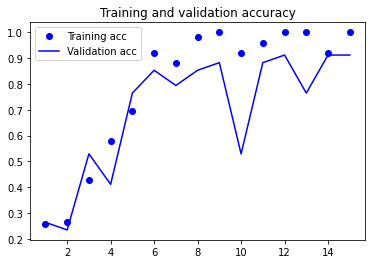

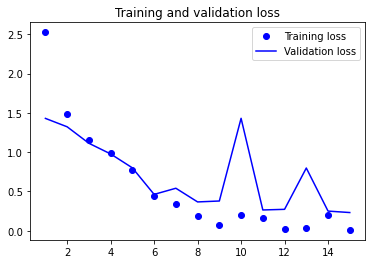

In [30]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [31]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
#           ABBAS  ==  0 Index

In [37]:
img = image.load_img("test/Abbas/IMG_20210722_171803.jpg", target_size=(400, 400))
x=image.img_to_array(img) / 255
resized_img_np = np.expand_dims(x,axis=0)
prediction = model.predict(resized_img_np)

In [38]:
prediction   # false

array([[0.31527624, 0.06111564, 0.6173905 , 0.00621753]], dtype=float32)

In [39]:
img = image.load_img("test/Abbas/IMG_20210722_171809.jpg", target_size=(400, 400))
x=image.img_to_array(img) / 255
resized_img_np = np.expand_dims(x,axis=0)
prediction = model.predict(resized_img_np)

In [40]:
prediction   #true

array([[0.77374184, 0.00812464, 0.21271226, 0.00542127]], dtype=float32)

In [41]:
img = image.load_img("test/Abbas/IMG_20210722_171535.jpg", target_size=(400, 400))
x=image.img_to_array(img) / 255
resized_img_np = np.expand_dims(x,axis=0)
prediction = model.predict(resized_img_np)

In [42]:
prediction    # true

array([[9.9140292e-01, 6.1743776e-04, 3.6523500e-03, 4.3273610e-03]],
      dtype=float32)

In [ ]:
#        FAROOQ  == 1   index

In [48]:
img = image.load_img("test/Farooq/IMG_20210720_180824.jpg", target_size=(400, 400))
x=image.img_to_array(img) / 255
resized_img_np = np.expand_dims(x,axis=0)
prediction = model.predict(resized_img_np)

In [49]:
prediction   # true

array([[0.04567704, 0.9306443 , 0.01433215, 0.00934645]], dtype=float32)

In [52]:
img = image.load_img("test/Farooq/IMG_20210722_181742.jpg", target_size=(400, 400))
x=image.img_to_array(img) / 255
resized_img_np = np.expand_dims(x,axis=0)
prediction = model.predict(resized_img_np)

In [53]:
prediction   # false

array([[0.6907246 , 0.27174678, 0.02198732, 0.01554126]], dtype=float32)

In [54]:
#      SAEED   = 2 index

In [55]:
img = image.load_img("test/Saeed/IMG_20210722_172451.jpg", target_size=(400, 400))
x=image.img_to_array(img) / 255
resized_img_np = np.expand_dims(x,axis=0)
prediction = model.predict(resized_img_np)

In [56]:
prediction    # true

array([[3.6101637e-04, 4.4390251e-04, 9.9630356e-01, 2.8914944e-03]],
      dtype=float32)

In [57]:
img = image.load_img("test/Saeed/IMG_20210722_172821.jpg", target_size=(400, 400))
x=image.img_to_array(img) / 255
resized_img_np = np.expand_dims(x,axis=0)
prediction = model.predict(resized_img_np)

In [58]:
prediction     #true

array([[0.00254089, 0.0012224 , 0.9950289 , 0.00120793]], dtype=float32)

In [59]:
img = image.load_img("test/Saeed/IMG_20210722_172001.jpg", target_size=(400, 400))
x=image.img_to_array(img) / 255
resized_img_np = np.expand_dims(x,axis=0)
prediction = model.predict(resized_img_np)

In [61]:
prediction    # true

array([[9.7478305e-06, 1.3565892e-05, 9.9988616e-01, 9.0509471e-05]],
      dtype=float32)

In [63]:
#    Shakeel     ==3 index

In [64]:
img = image.load_img("test/Shakeel/IMG_20210722_171409.jpg", target_size=(400, 400))
x=image.img_to_array(img) / 255
resized_img_np = np.expand_dims(x,axis=0)
prediction = model.predict(resized_img_np)

In [65]:
prediction   # true

array([[1.226748e-04, 3.882772e-04, 6.825984e-03, 9.926630e-01]],
      dtype=float32)

In [66]:
img = image.load_img("test/Shakeel/IMG_20210721_131942.jpg", target_size=(400, 400))
x=image.img_to_array(img) / 255
resized_img_np = np.expand_dims(x,axis=0)
prediction = model.predict(resized_img_np)

In [67]:
prediction   #true

array([[0.01311398, 0.06826828, 0.00267857, 0.9159392 ]], dtype=float32)